# **TAREFA - MODELAGEM DE SEGMENTAÇÃO**
### *Case: Streaming* (base de dados: Streaming.txt)
##### Uma empresa que fornece um serviço de streaming de conteúdo deseja segmentar os seus usuários frequentes com base em suas preferências de gêneros de filmes, a fim de personalizar os títulos que são recomendados. Para isso, organizou uma base de dados com 1.590 usuários que assistiram a 20 filmes ou mais nos últimos 3 meses, divididos em 11 categorias principais. As variáveis disponíveis na base de dados são:
* *ID_REGISTRO:* Código de registro do usuário
* *QTD_FILMES_ACAO:* Quantidade de filmes assistidos pelo usuário na categoria Ação, nos últimos 3 meses
* *QTD_FILMES_ANIMACAO:* Quantidade de filmes assistidos pelo usuário na categoria Animação, nos últimos 3 meses
* *QTD_FILMES_AVENTURA:* Quantidade de filmes assistidos pelo usuário na categoria Aventura, nos últimos 3 meses
* *QTD_FILMES_COMEDIA:* Quantidade de filmes assistidos pelo usuário na categoria Comédia, nos últimos 3 meses
* *QTD_FILMES_DOCUMENTARIO:* Quantidade de filmes assistidos pelo usuário na categoria Documentário, nos últimos 3 meses
* *QTD_FILMES_DRAMA:* Quantidade de filmes assistidos pelo usuário na categoria Drama, nos últimos 3 meses
* *QTD_FILMES_FICCAO:* Quantidade de filmes assistidos pelo usuário na categoria Ficção, nos últimos 3 meses
* *QTD_FILMES_MUSICAL:* Quantidade de filmes assistidos pelo usuário na categoria Musical, nos últimos 3 meses
* *QTD_FILMES_ROMANCE:* Quantidade de filmes assistidos pelo usuário na categoria Romance, nos últimos 3 meses
* *QTD_FILMES_SUSPENSE:* Quantidade de filmes assistidos pelo usuário na categoria Suspense, nos últimos 3 meses
* *QTD_FILMES_TERROR:* Quantidade de filmes assistidos pelo usuário na categoria Terror, nos últimos 3 meses


##### Utilize diferentes algoritmos de segmentação para agrupar os usuários com base em suas preferências. Teste diferentes hiperparâmetros. Proponha uma segmentação final, interprete os clusters obtidos e explique por que adotou esta proposta, em relação às demais configurações que observou ao longo dos testes.

##### **Entregável**: notebook do Python (extensão .ipynb) já compilado, subdividido de acordo com as seções abaixo.


### CARREGAMENTO DE BIBLIOTECAS

In [72]:
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler                    # Padrnozação de variáveis
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster   # Agrupamento hierárquico
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering      # Agrupamentos por k-médias, DBSCAN e segmentação espectral
from sklearn.decomposition import PCA                               # Redução de dimensões

### LEITURA DA BASE DE DADOS

In [73]:
df = pd.read_table("Streaming.txt",
                      decimal = ".",
                      sep = "\t")

In [74]:
display(df)

,ID_REGISTRO,QTD_FILMES_ACAO,QTD_FILMES_ANIMACAO,QTD_FILMES_AVENTURA,QTD_FILMES_COMEDIA,QTD_FILMES_DOCUMENTARIO,QTD_FILMES_DRAMA,QTD_FILMES_FICCAO,QTD_FILMES_MUSICAL,QTD_FILMES_ROMANCE,QTD_FILMES_SUSPENSE,QTD_FILMES_TERROR
0,1,2,8,1,7,1,1,0,5,11,1,0
1,2,2,5,5,3,1,1,1,3,5,7,5
2,3,0,0,0,1,9,14,0,0,2,0,0
3,4,29,0,1,1,0,0,1,0,0,1,0
4,5,41,0,2,2,0,0,5,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1584,1586,3,10,7,1,1,9,2,8,1,1,2
1585,1587,0,0,0,0,0,1,2,0,0,27,0
1586,1588,19,0,4,2,0,0,4,0,0,2,0
1587,1589,1,0,0,0,0,1,3,0,0,31,6


### FLUXO DE MODELAGEM E ANÁLISE EXPLORATÓRIA DOS CLUSTERS

Separando as featureas e utilizando o "StandardScaler" para padronizar os dados.

In [75]:
X = df[['QTD_FILMES_ACAO', 'QTD_FILMES_ANIMACAO', 'QTD_FILMES_AVENTURA', 'QTD_FILMES_COMEDIA','QTD_FILMES_DOCUMENTARIO',
        'QTD_FILMES_DRAMA','QTD_FILMES_FICCAO','QTD_FILMES_MUSICAL','QTD_FILMES_ROMANCE','QTD_FILMES_SUSPENSE','QTD_FILMES_TERROR']].values
X_scaled = StandardScaler().fit_transform(X)

## Redução do tamanho da amostra

Reduzindo o tamanho da amostra a fim de melhoria de performance

In [76]:
X_sample_scaled = X_scaled[np.random.choice(X_scaled.shape[0], size = 1000, replace = False)]

## Estimativa visual da quantidade de clusters, usando redução de dimensionalidade (ACP)

Redução dos clusters para duas dimensões via ACP, para fins de visualização aproximada

In [77]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
var_explicada = pca.explained_variance_ratio_ * 100

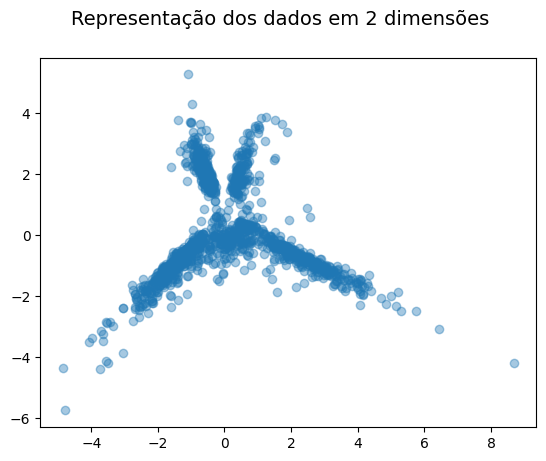

In [78]:
# Visualização
plt.scatter(X_pca[:, 0],
            X_pca[:, 1],
            alpha = 0.4)
plt.suptitle("Representação dos dados em 2 dimensões", fontsize = 14)
plt.show()

Verificando visualmente a representação dos dados em duas dimensões, é possível identificar possíveis 4 clusters

## Estimativa visual da quantidade de clusters, usando o algoritmo hierárquico

Segmentação com método hierárquico, para diferentes métodos de ligação

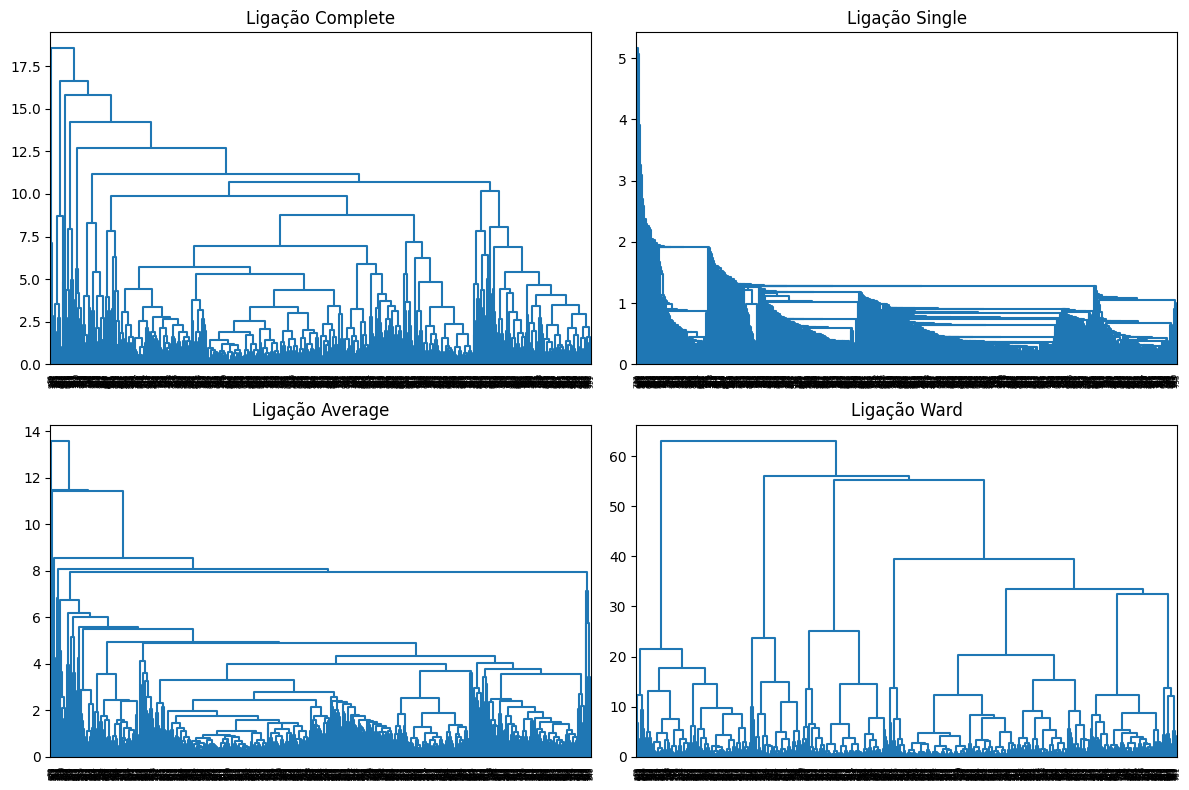

In [79]:
metodos = ['complete', 'single', 'average', 'ward']
fig, axes = plt.subplots(2, 2, figsize = (12, 8))

for ax, metodo in zip(axes.flatten(), metodos):
    Z = linkage(X_sample_scaled, method = metodo)
    dendrogram(Z,
               ax = ax,
               color_threshold = 0)
    ax.set_title(f'Ligação {metodo.capitalize()}')
    plt.setp(ax.get_xticklabels(), rotation = 90)

plt.tight_layout()
plt.show()

## Segmentação com K-médias

Hiperparâmetro, total de clusters estimados

In [84]:
n_clusters = 4

Segmentação com K-médias

In [85]:
k_medias = KMeans(n_clusters = n_clusters, n_init = 25, random_state = 123)
cluster_k_medias = k_medias.fit_predict(X_scaled)

Frequência por cluster

In [86]:
pd.Series(cluster_k_medias).value_counts().sort_index()

,count
0,713
1,463
2,148
3,265


Visualização aproximada dos resultados

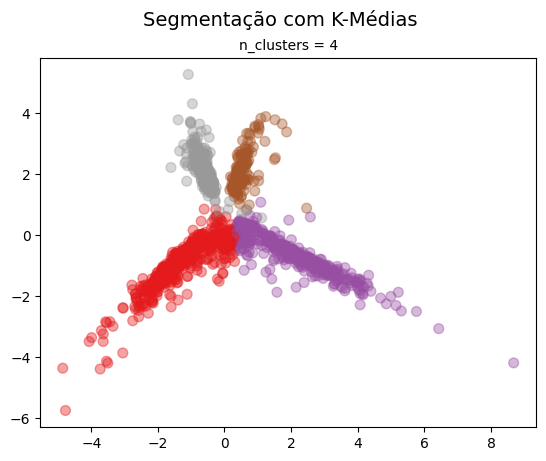

In [87]:
plt.scatter(X_pca[:, 0],
            X_pca[:, 1],
            c = cluster_k_medias,
            cmap = 'Set1',
            alpha = 0.4,
            s = 50)
plt.suptitle("Segmentação com K-Médias", fontsize = 14)
plt.title(f"n_clusters = {n_clusters}", fontsize = 10)
plt.show()

Análise descritiva dos clusters

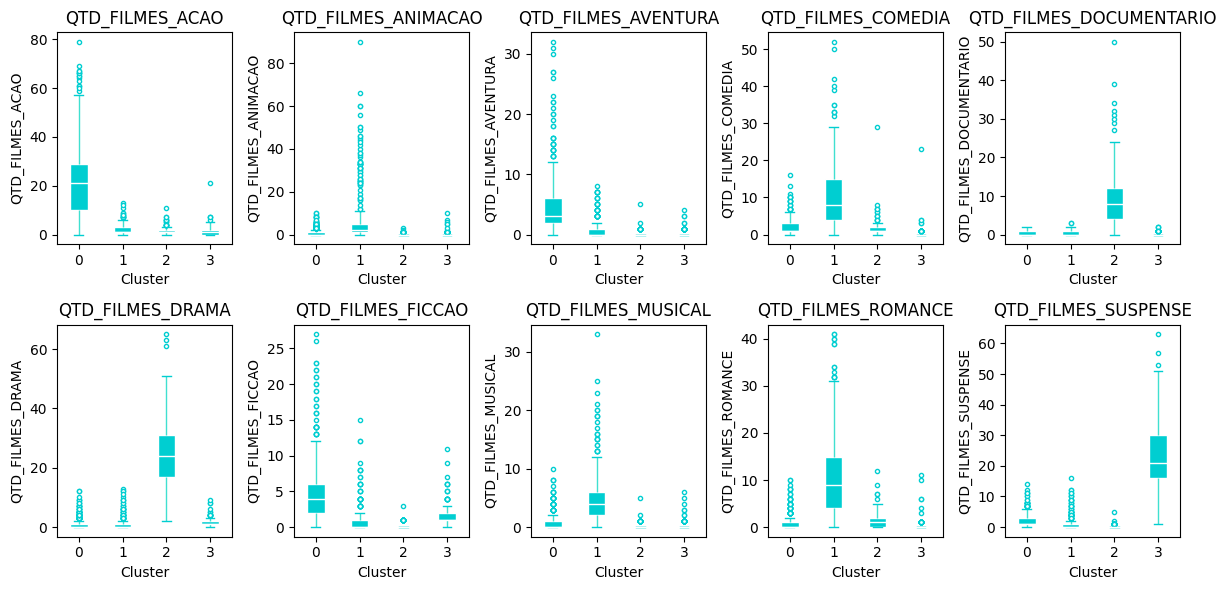

In [88]:
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (12, 6))

variaveis = ['QTD_FILMES_ACAO', 'QTD_FILMES_ANIMACAO', 'QTD_FILMES_AVENTURA', 'QTD_FILMES_COMEDIA','QTD_FILMES_DOCUMENTARIO',
             'QTD_FILMES_DRAMA','QTD_FILMES_FICCAO','QTD_FILMES_MUSICAL','QTD_FILMES_ROMANCE','QTD_FILMES_SUSPENSE','QTD_FILMES_TERROR']

for ax, variavel in zip(axes.flat, variaveis):

  sns.boxplot(y = variavel,
              x = cluster_k_medias,
              data = df,
              width = 0.4,
              boxprops = {'facecolor':'darkturquoise', 'edgecolor':'white'},
              whiskerprops = {'color':'turquoise'},
              capprops     = {'color': 'darkturquoise'},
              medianprops  = {'color':'white'},
              flierprops   = {'markerfacecolor': 'white', 'markeredgecolor': 'darkturquoise', 'marker': 'o', 'markersize': 3, 'color': 'turquoise', 'linestyle': 'none'},
              ax = ax)
  ax.set_title(f'{variavel}')
  ax.set_xlabel('Cluster')

plt.tight_layout()
plt.show()

Apartir dessa analise, podemos observar:

Cluster 0: Prefere mais filmes de ação, aventura e ficção;

Cluster 1: Prefere mais filmes do tipo musical, romance e comédia;

Cluster 2: Prefere mais filmes do tipo documentário e drama;

Cluster 3: Prefere mais filmes de suspense;


Faz super sentido essa segmentação, pensando logicamente dos tipos de gostos que podem se relacionarem.

## Segmentação com DBSCAN

Melhor teste de Hiperparâmetros

In [154]:
eps = 1.5
min_samples = 10    # 10

Segmentação com DBSCAN

In [155]:
dbscan = DBSCAN(eps = eps, min_samples = min_samples)
cluster_dbscan = dbscan.fit_predict(X_scaled)

Frequência por cluster

In [156]:
pd.Series(cluster_dbscan).value_counts().sort_index()

,count
-1,113
0,1343
1,133


Visualização aproximada dos resultados

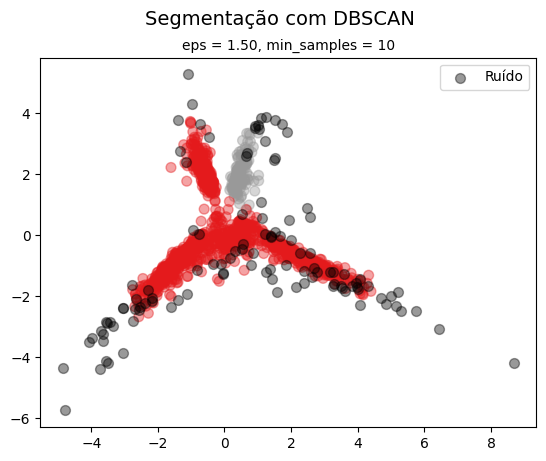

In [157]:
plt.scatter(X_pca[cluster_dbscan != -1][:, 0],
            X_pca[cluster_dbscan != -1][:, 1],
            c = cluster_dbscan[cluster_dbscan != -1],
            cmap = 'Set1',
            alpha = 0.4,
            s = 50)
plt.scatter(X_pca[cluster_dbscan == -1][:, 0],
            X_pca[cluster_dbscan == -1][:, 1],
            c = 'black',
            alpha = 0.4,
            s = 50,
            label = 'Ruído')
plt.suptitle("Segmentação com DBSCAN", fontsize = 14)
plt.title(f"eps = {eps:.2f}, min_samples = {min_samples}", fontsize = 10)
plt.legend(loc = 'upper right')
plt.show()

Análise descritiva dos clusters

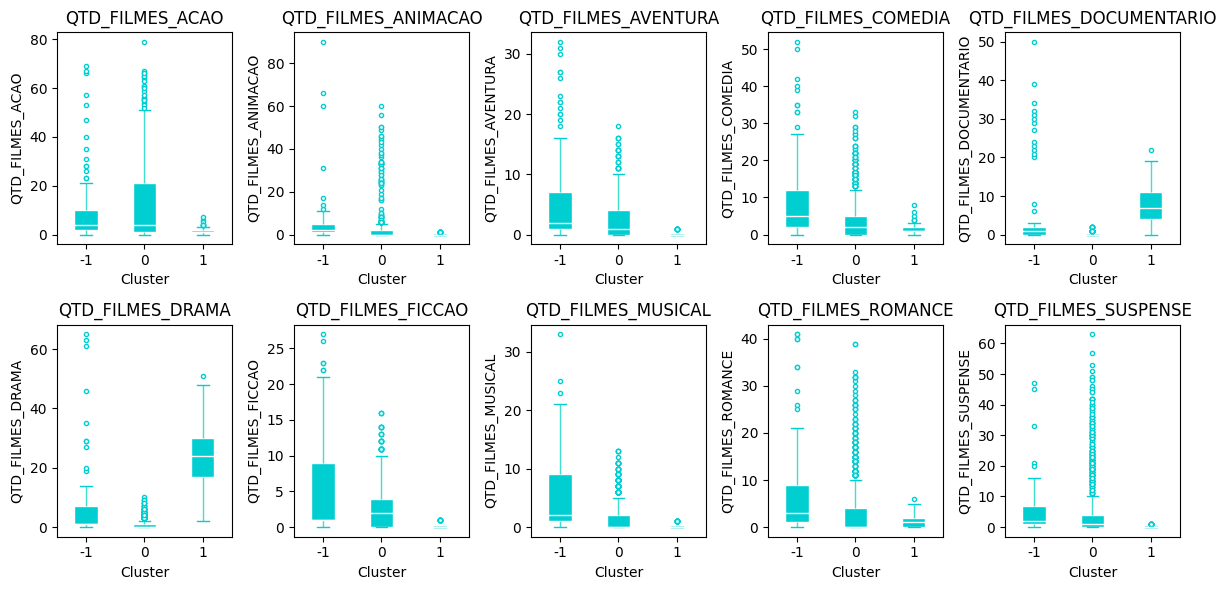

In [158]:
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (12, 6))

variaveis = ['QTD_FILMES_ACAO', 'QTD_FILMES_ANIMACAO', 'QTD_FILMES_AVENTURA', 'QTD_FILMES_COMEDIA','QTD_FILMES_DOCUMENTARIO',
             'QTD_FILMES_DRAMA','QTD_FILMES_FICCAO','QTD_FILMES_MUSICAL','QTD_FILMES_ROMANCE','QTD_FILMES_SUSPENSE','QTD_FILMES_TERROR']

for ax, variavel in zip(axes.flat, variaveis):

  sns.boxplot(y = variavel,
              x = cluster_dbscan,
              data = df,
              width = 0.4,
              boxprops = {'facecolor':'darkturquoise', 'edgecolor':'white'},
              whiskerprops = {'color':'turquoise'},
              capprops     = {'color': 'darkturquoise'},
              medianprops  = {'color':'white'},
              flierprops   = {'markerfacecolor': 'white', 'markeredgecolor': 'darkturquoise', 'marker': 'o', 'markersize': 3, 'color': 'turquoise', 'linestyle': 'none'},
              ax = ax)
  ax.set_title(f'{variavel}')
  ax.set_xlabel('Cluster')

plt.tight_layout()
plt.show()

Apartir dessa analise, podemos observar:

Cluster -1: É um grupo mais generalista, mas tende a não gostar tanto de documentários;

Cluster 0: Prefere mais filmes do tipo ação, aventura, comédia, ficção e temos alguns casos de musical, romance e suspense;

Cluster 1: Prefere mais filmes do tipo documentário e drama;

Essa clusterização acabou sendo mais genérica, não especificou da melhor forma, como o k-médias por exemplo.

## Segmentação espectral com KNN

Melhor teste de Hiperparâmetros

In [186]:
n_clusters = 4
affinity = 'nearest_neighbors'
n_neighbors = 6

Segmentação espectral, usando KNN

In [187]:
spectral_knn = SpectralClustering(n_clusters = n_clusters, affinity = affinity, n_neighbors = n_neighbors, assign_labels = 'kmeans', random_state = 123)
cluster_spectral_knn = spectral_knn.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Frequência por cluster

In [188]:
pd.Series(cluster_spectral_knn).value_counts().sort_index()

,count
0,387
1,796
2,258
3,148


Visualização aproximada dos resultados

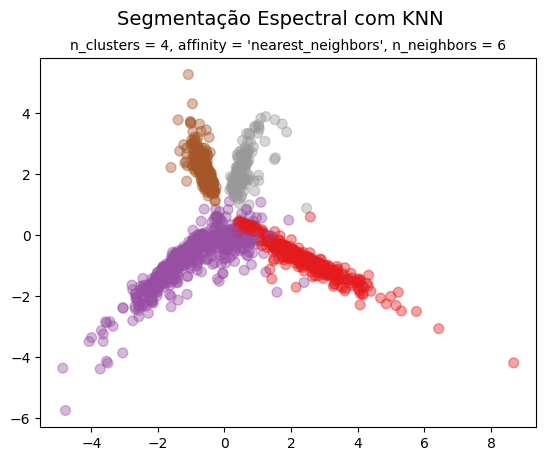

In [189]:
plt.scatter(X_pca[:, 0],
            X_pca[:, 1],
            c = cluster_spectral_knn,
            cmap = 'Set1',
            alpha = 0.4,
            s = 50)
plt.suptitle("Segmentação Espectral com KNN", fontsize = 14)
plt.title(f"n_clusters = {n_clusters}, affinity = '{affinity}', n_neighbors = {n_neighbors}", fontsize = 10)
plt.show()

Análise descritiva dos clusters

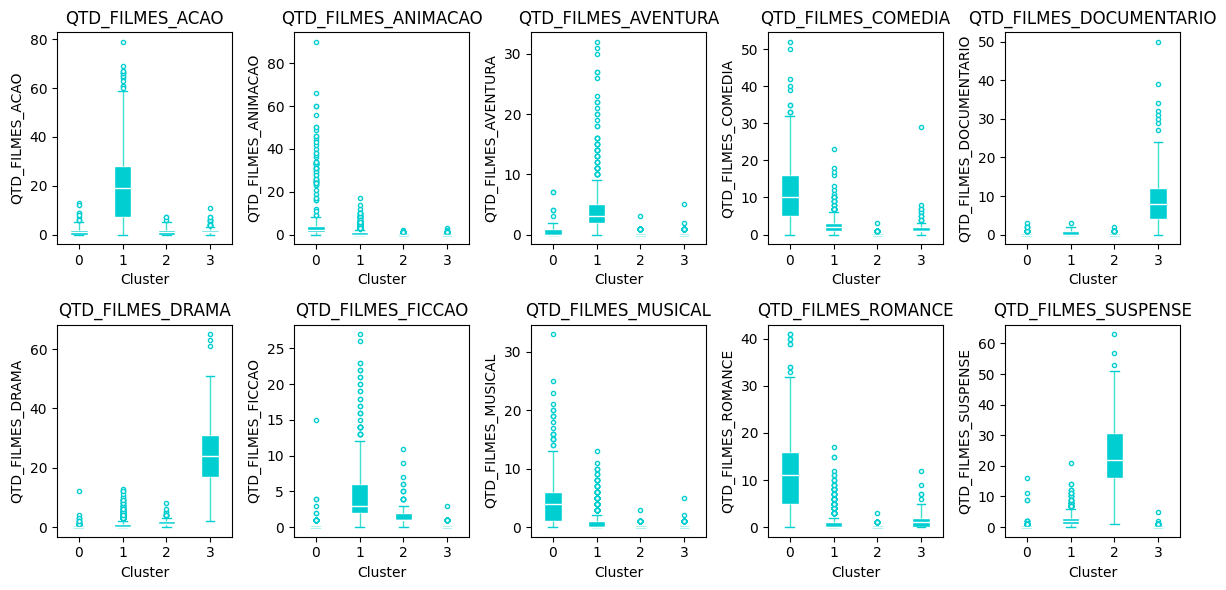

In [190]:
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (12, 6))

variaveis = ['QTD_FILMES_ACAO', 'QTD_FILMES_ANIMACAO', 'QTD_FILMES_AVENTURA', 'QTD_FILMES_COMEDIA','QTD_FILMES_DOCUMENTARIO',
             'QTD_FILMES_DRAMA','QTD_FILMES_FICCAO','QTD_FILMES_MUSICAL','QTD_FILMES_ROMANCE','QTD_FILMES_SUSPENSE','QTD_FILMES_TERROR']


for ax, variavel in zip(axes.flat, variaveis):

  sns.boxplot(y = variavel,
              x = cluster_spectral_knn,
              data = df,
              width = 0.4,
              boxprops = {'facecolor':'darkturquoise', 'edgecolor':'white'},
              whiskerprops = {'color':'turquoise'},
              capprops     = {'color': 'darkturquoise'},
              medianprops  = {'color':'white'},
              flierprops   = {'markerfacecolor': 'white', 'markeredgecolor': 'darkturquoise', 'marker': 'o', 'markersize': 3, 'color': 'turquoise', 'linestyle': 'none'},
              ax = ax)
  ax.set_title(f'{variavel}')
  ax.set_xlabel('Cluster')

plt.tight_layout()
plt.show()

Apartir dessa analise, podemos observar:

Cluster 0: Prefere mais filmes de comédia, musical e romance;

Cluster 1: Prefere mais filmes de ação, aventura e ficção;

Cluster 2: Prefere mais filmes de suspense;

Cluster 3: Prefere mais filmes do tipo documentário e drama;

Interessante que o resultado ficou igual ao K-médias, mas em posições diferentes e pode-se observar menos ruído também. De forma geral, os dois algoritmos captaram bem gostos que poderiam se relacionar.

## Segmentação espectral com kernel gaussiano

Melhor teste de Hiperparâmetros

In [191]:
n_clusters = 4
affinity = 'rbf'
gamma = 0.01

Segmentação espectral, usando kernel gaussiano

In [192]:
spectral_gaussian = SpectralClustering(n_clusters = n_clusters, affinity = affinity, gamma = gamma, assign_labels = 'kmeans', random_state = 123)
cluster_spectral_gaussian = spectral_gaussian.fit_predict(X_scaled)

Frequência por cluster

In [193]:
pd.Series(cluster_spectral_gaussian).value_counts().sort_index()

,count
0,755
1,421
2,265
3,148


Visualização aproximada dos resultados

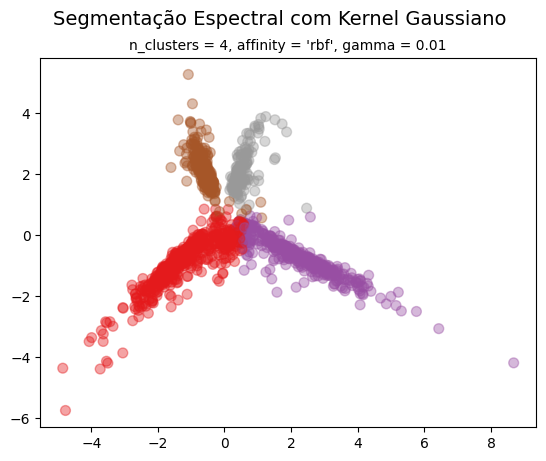

In [194]:
plt.scatter(X_pca[:, 0],
            X_pca[:, 1],
            c = cluster_spectral_gaussian,
            cmap = 'Set1',
            alpha = 0.4,
            s = 50)
plt.suptitle("Segmentação Espectral com Kernel Gaussiano", fontsize = 14)
plt.title(f"n_clusters = {n_clusters}, affinity = '{affinity}', gamma = {gamma}", fontsize = 10)
plt.show()

Análise descritiva dos clusters

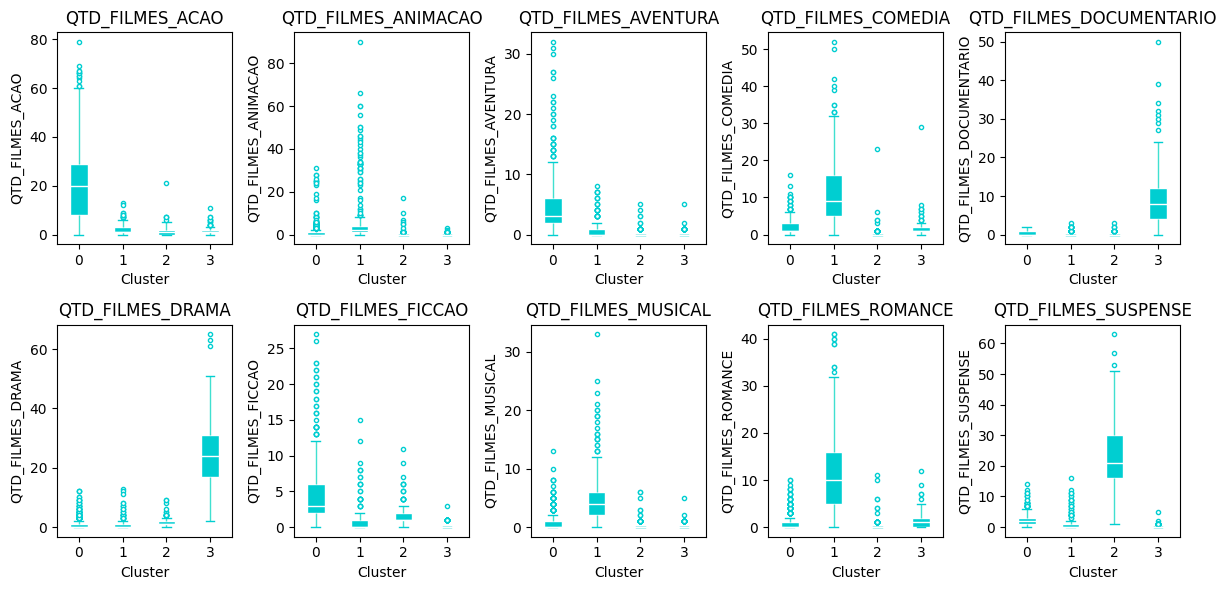

In [195]:
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (12, 6))

variaveis = ['QTD_FILMES_ACAO', 'QTD_FILMES_ANIMACAO', 'QTD_FILMES_AVENTURA', 'QTD_FILMES_COMEDIA','QTD_FILMES_DOCUMENTARIO',
             'QTD_FILMES_DRAMA','QTD_FILMES_FICCAO','QTD_FILMES_MUSICAL','QTD_FILMES_ROMANCE','QTD_FILMES_SUSPENSE','QTD_FILMES_TERROR']

for ax, variavel in zip(axes.flat, variaveis):

  sns.boxplot(y = variavel,
              x = cluster_spectral_gaussian,
              data = df,
              width = 0.4,
              boxprops = {'facecolor':'darkturquoise', 'edgecolor':'white'},
              whiskerprops = {'color':'turquoise'},
              capprops     = {'color': 'darkturquoise'},
              medianprops  = {'color':'white'},
              flierprops   = {'markerfacecolor': 'white', 'markeredgecolor': 'darkturquoise', 'marker': 'o', 'markersize': 3, 'color': 'turquoise', 'linestyle': 'none'},
              ax = ax)
  ax.set_title(f'{variavel}')
  ax.set_xlabel('Cluster')

plt.tight_layout()
plt.show()

Apartir dessa analise, podemos observar:

Cluster 0: Prefere mais filmes de ação, aventura e ficção;

Cluster 1: Prefere mais filmes de comédia, musical e romance;

Cluster 2: Prefere mais filmes de suspense;

Cluster 3: Prefere mais filmes do ttipo documentário e drama;

Interessante que o resultado ficou igual ao K-médias e o KNN, mas somente um cluster em posições diferentes. De forma geral, os três algoritmos captaram bem gostos que poderiam se relacionar.

### COMENTÁRIOS E CONCLUSÕES

Por fim, observamos que os algoritmos K-médias, KNN e espectral com kernel Gaussiano obtiveram resultados semelhantes e capturaram bem as preferências que poderiam estar relacionadas. Dado que os três modelos produzem resultados consistentes, podemos optar por implementar aquele que oferece maior eficiência computacional, neste caso, o K-médias.